## 讀取房屋資料

In [156]:
import pandas
df = pandas.read_excel('Data\house_price_regression.xlsx')
df.head()

,url,title,age,area,floor_info,direction,layout,price
0,http://esf.sh.fang.com/chushou/3_289079207.htm,"新出笋盘,业主急售,低于市场价30万,精装南北通,近11/12号线",建筑年代：1998\r\n,65,中层(共6层)\r\n,南北向\r\n,\r\n 2室1厅\r\n ...,3500000
1,http://esf.sh.fang.com/chushou/3_290295785.htm,"业主急抛,低于市场价50万,双南双天井,闹中取静,近3/12号线!",建筑年代：1996\r\n,90,低层(共6层)\r\n,南北向\r\n,\r\n 3室2厅\r\n ...,5000000
2,http://esf.sh.fang.com/chushou/3_290971789.htm,新出笋盘 近11号线 东边套 低于市价50万 送20平米花园 急售,建筑年代：1998\r\n,72,低层(共6层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,3980000
3,http://esf.sh.fang.com/chushou/3_290987582.htm,"业主出国急售:板式两房,精装修全明,带产权车位,看房方便!",建筑年代：2006\r\n,96,高层(共7层)\r\n,南北向\r\n,\r\n 2室2厅\r\n ...,5500000
4,http://esf.sh.fang.com/chushou/3_291070232.htm,"徐汇滨江板块,双南两居,小高层带电梯,使用面积大,近3,11号线",建筑年代：1996\r\n,86,中层(共7层)\r\n,南向\r\n,\r\n 2室1厅\r\n ...,4500000


## 房屋資料預處理

In [166]:
df['age'] = df['age'].map(lambda e: 2017 - int(e.strip().strip('建筑年代：')) )
df[['room', 'living_room']] = df['layout'].str.extract('(\d+)室(\d+)厅')
df['room'] = df['room'].astype(int)
df['living_room'] = df['living_room'].astype(int)
df['total_floor'] = df['floor_info'].str.extract('共(\d+)层')
df['total_floor'] = df['total_floor'].astype(int)
df['floor']       = df['floor_info'].str.extract('^(.)层')
df['direction']   = df['direction'].map(lambda e: e.strip())

In [168]:
df.head()

,url,title,age,area,floor_info,direction,layout,price,room,living_room,total_floor,floor
0,http://esf.sh.fang.com/chushou/3_289079207.htm,"新出笋盘,业主急售,低于市场价30万,精装南北通,近11/12号线",19,65,中层(共6层)\r\n,南北向,\r\n 2室1厅\r\n ...,3500000,2,1,6,中
1,http://esf.sh.fang.com/chushou/3_290295785.htm,"业主急抛,低于市场价50万,双南双天井,闹中取静,近3/12号线!",21,90,低层(共6层)\r\n,南北向,\r\n 3室2厅\r\n ...,5000000,3,2,6,低
2,http://esf.sh.fang.com/chushou/3_290971789.htm,新出笋盘 近11号线 东边套 低于市价50万 送20平米花园 急售,19,72,低层(共6层)\r\n,南向,\r\n 2室1厅\r\n ...,3980000,2,1,6,低
3,http://esf.sh.fang.com/chushou/3_290987582.htm,"业主出国急售:板式两房,精装修全明,带产权车位,看房方便!",11,96,高层(共7层)\r\n,南北向,\r\n 2室2厅\r\n ...,5500000,2,2,7,高
4,http://esf.sh.fang.com/chushou/3_291070232.htm,"徐汇滨江板块,双南两居,小高层带电梯,使用面积大,近3,11号线",21,86,中层(共7层)\r\n,南向,\r\n 2室1厅\r\n ...,4500000,2,1,7,中


In [169]:
del df['layout']
del df['floor_info']
del df['title']
del df['url']

In [170]:
df.head()

,age,area,direction,price,room,living_room,total_floor,floor
0,19,65,南北向,3500000,2,1,6,中
1,21,90,南北向,5000000,3,2,6,低
2,19,72,南向,3980000,2,1,6,低
3,11,96,南北向,5500000,2,2,7,高
4,21,86,南向,4500000,2,1,7,中


In [171]:
df = pandas.concat([df, pandas.get_dummies(df['direction']), pandas.get_dummies(df['floor'])], axis = 1 )

In [172]:
df.head()

,age,area,direction,price,room,living_room,total_floor,floor,东南向,东向,南北向,南向,西南向,西向,中,低,高
0,19,65,南北向,3500000,2,1,6,中,0,0,1,0,0,0,1,0,0
1,21,90,南北向,5000000,3,2,6,低,0,0,1,0,0,0,0,1,0
2,19,72,南向,3980000,2,1,6,低,0,0,0,1,0,0,0,1,0
3,11,96,南北向,5500000,2,2,7,高,0,0,1,0,0,0,0,0,1
4,21,86,南向,4500000,2,1,7,中,0,0,0,1,0,0,1,0,0


In [173]:
del df['南北向']
del df['低']
del df['direction']
del df['floor']

In [174]:
df.head()

,age,area,price,room,living_room,total_floor,东南向,东向,南向,西南向,西向,中,高
0,19,65,3500000,2,1,6,0,0,0,0,0,1,0
1,21,90,5000000,3,2,6,0,0,0,0,0,0,0
2,19,72,3980000,2,1,6,0,0,1,0,0,0,0
3,11,96,5500000,2,2,7,0,0,0,0,0,0,1
4,21,86,4500000,2,1,7,0,0,1,0,0,1,0


## 繪製散佈圖

Populating the interactive namespace from numpy and matplotlib


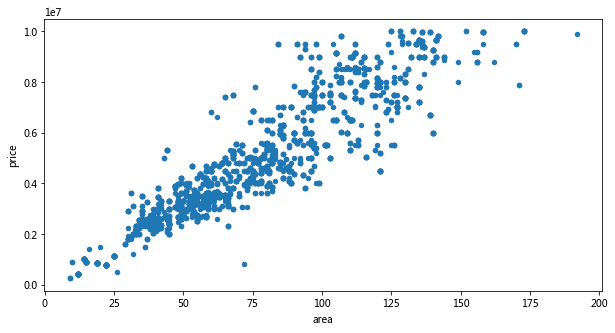

In [175]:
%pylab inline
df[['price', 'area']].plot(kind='scatter', x = 'area', y = 'price', figsize=[10,5])

## 分析價格與平米關係

In [176]:
y= df['price']
X = df[['area']]

In [177]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 64846.01038065]
Intercept:-9165.217457327992


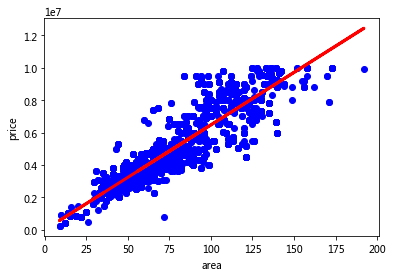

In [179]:
plt.scatter(X,y, color="blue")
plt.plot(X, regr.predict(X), linewidth = 3, color = "red")
plt.xlabel('area')
plt.ylabel('price')

## 多元迴歸預測

In [180]:
y= df['price'].values
X = df[['age', 'area', 'room', 'living_room', 'total_floor', '东南向', '东向', '南向', '西南向', '西向', '中', '高']]

In [181]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2792 entries, 0 to 2791
Data columns (total 12 columns):
age            2792 non-null int64
area           2792 non-null int64
room           2792 non-null int32
living_room    2792 non-null int32
total_floor    2792 non-null int32
东南向            2792 non-null uint8
东向             2792 non-null uint8
南向             2792 non-null uint8
西南向            2792 non-null uint8
西向             2792 non-null uint8
中              2792 non-null uint8
高              2792 non-null uint8
dtypes: int32(3), int64(2), uint8(7)
memory usage: 117.2 KB


## 評估迴歸模型 

In [183]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1319.
Date:                Mon, 05 Jun 2017   Prob (F-statistic):               0.00
Time:                        00:05:02   Log-Likelihood:                -42320.
No. Observations:                2792   AIC:                         8.467e+04
Df Residuals:                    2779   BIC:                         8.474e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        1126.6698   1.06e+05      0.011      

## 透過AIC 選定最佳參數組合

In [184]:
predictorcols = ['age', 'area', 'room', 'living_room', 'total_floor', '东南向', '东向', '南向', '西南向', '西向', '中', '高']
import itertools
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors  = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(y, predictors2)
        res = est.fit()
        AICs[variables] = res.aic    



In [185]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-10]

[(('age', 'area', 'room', 'total_floor', '东南向', '东向', '南向', '西南向', '西向', '中'),
  84662.966235425629),
 (('age', 'area', 'room', 'total_floor', '东向', '南向', '西南向', '中'),
  84670.325585499668),
 (('age', 'area', 'room', 'total_floor', '南向', '西南向', '西向', '中'),
  84673.843801994037),
 (('area', 'room', 'total_floor', '东向', '南向', '西南向', '西向', '中'),
  84678.757206266499),
 (('area', 'room', 'total_floor', '东南向', '东向', '南向', '西南向', '中'),
  84681.895271412403),
 (('area', 'room', 'total_floor', '东南向', '南向', '西南向', '西向', '中', '高'),
  84684.520119580906),
 (('age', 'area', 'room', 'total_floor', '东向', '西南向', '中'),
  84687.261020931037),
 (('area', 'room', 'living_room', 'total_floor', '南向', '西南向', '西向', '中', '高'),
  84689.561001611248),
 (('area', 'room', 'living_room', 'total_floor', '南向', '西南向', '中', '高'),
  84695.701194106776),
 (('age', 'area', 'room', 'living_room', 'total_floor', '西南向', '西向', '中'),
  84698.248728856852),
 (('age',
   'area',
   'room',
   'living_room',
   'total_floor',
  